In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('datasets/GlobalTemperatures.csv')
df_city = pd.read_csv('datasets/GlobalLandTemperaturesByCity.csv')
df_country = pd.read_csv('datasets/GlobalLandTemperaturesByCountry.csv')
df_major = pd.read_csv('datasets/GlobalLandTemperaturesByMajorCity.csv')
df_state = pd.read_csv('datasets/GlobalLandTemperaturesByState.csv')

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])
df_city['dt'] = pd.to_datetime(df_city['dt'])
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_major['dt'] = pd.to_datetime(df_major['dt'])
df_state['dt'] = pd.to_datetime(df_state['dt'])

In [ ]:
df = df.set_index('dt')
df_city = df_city.set_index('dt')
df_country = df_country.set_index('dt')
df_major = df_major.set_index('dt')
df_state = df_state.set_index('dt')

In [ ]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


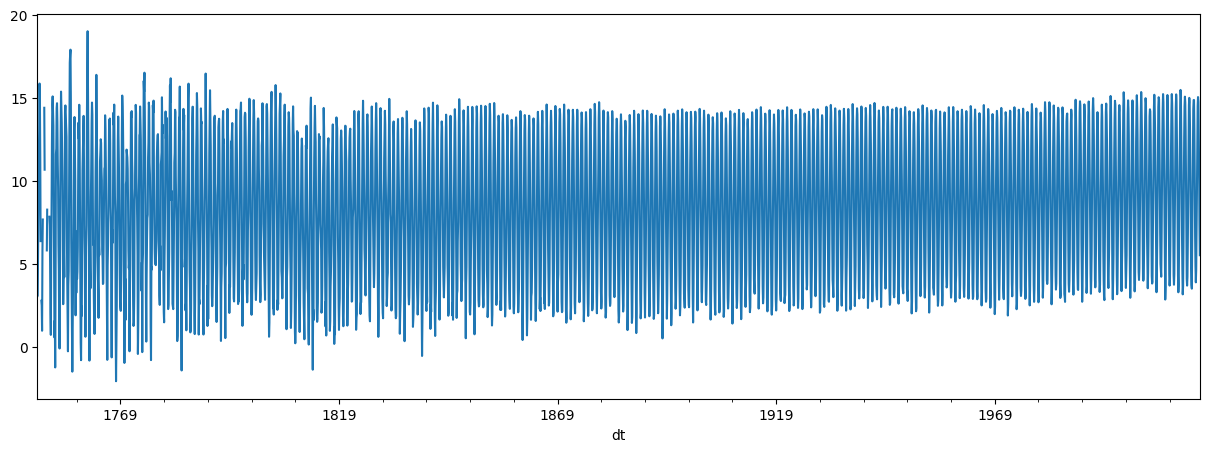

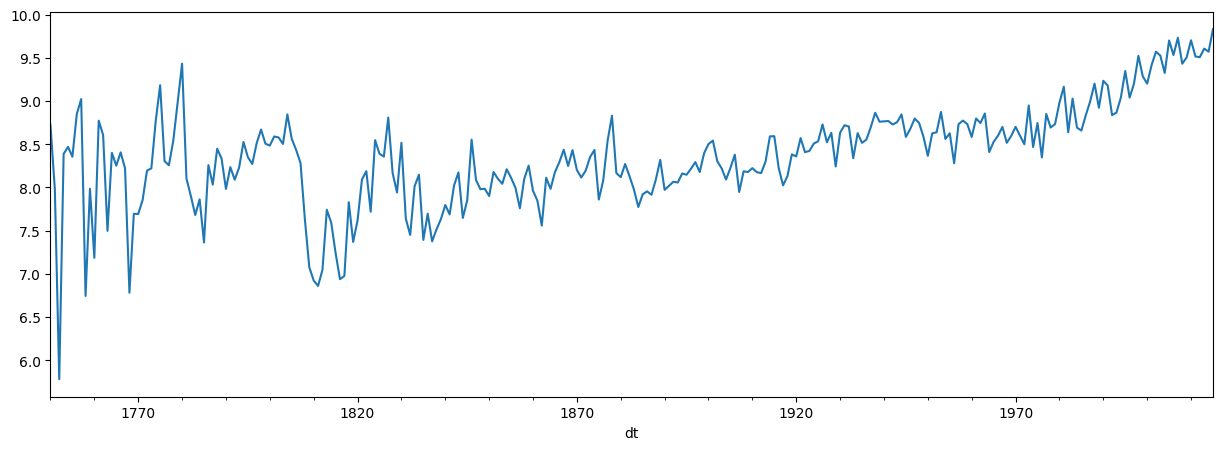

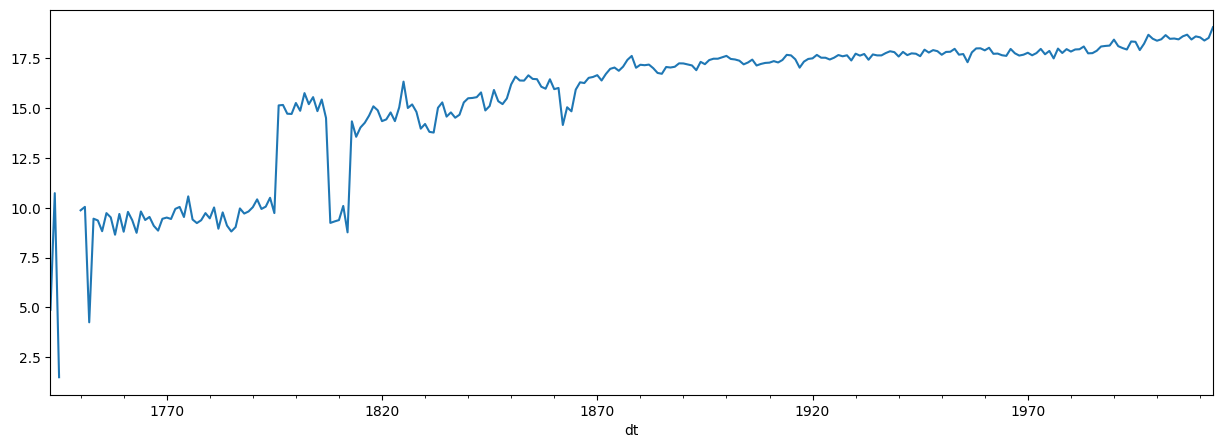

<AxesSubplot: xlabel='dt'>

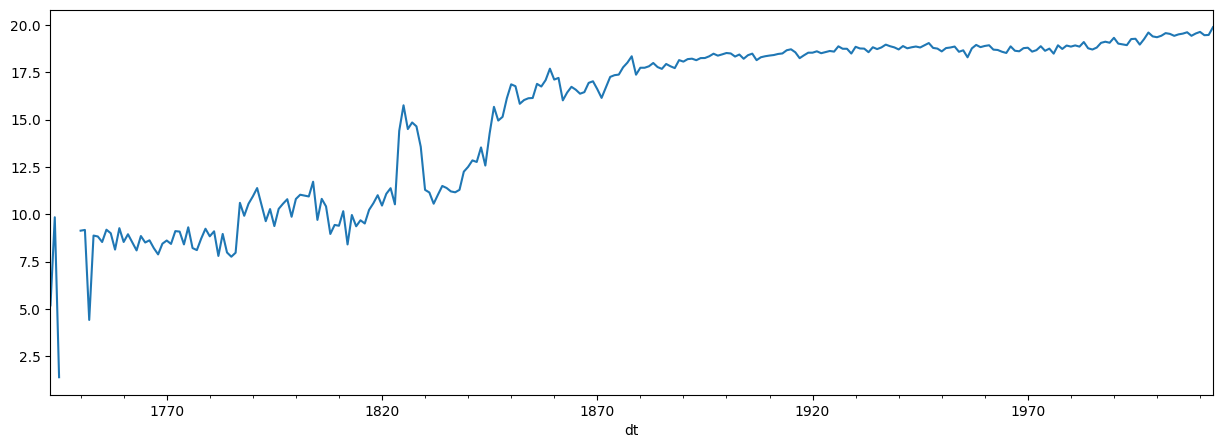

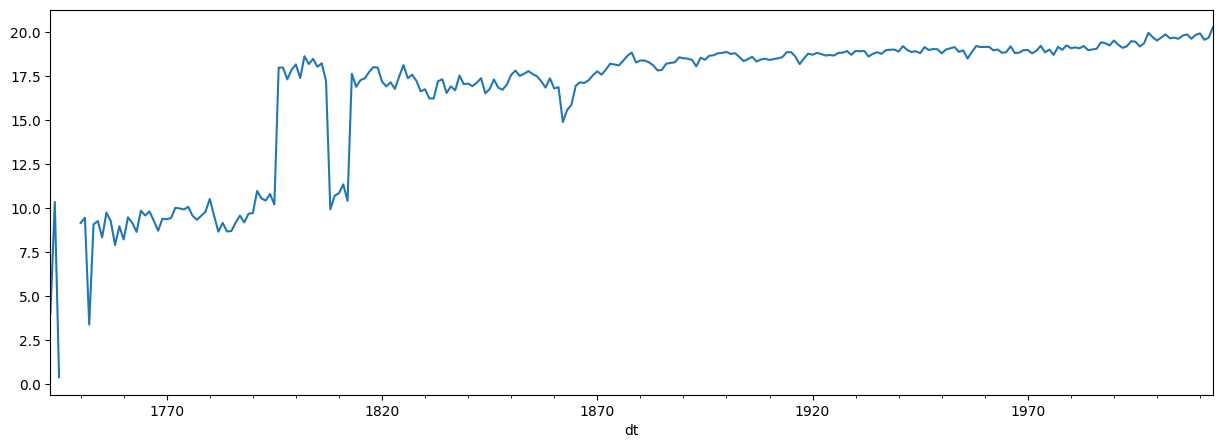

In [ ]:
# Exploratory Data Analysis
# Global Temperatures
plt.figure(figsize=(15, 5))
df['LandAverageTemperature'].plot()
plt.show()

# Global Land Temperatures By City
plt.figure(figsize=(15, 5))
df['LandAverageTemperature'].resample('A').mean().plot()
plt.show()

# Global Land Temperatures By City
plt.figure(figsize=(15, 5))
df_city['AverageTemperature'].resample('A').mean().plot()
plt.show()

# Global Land Temperatures By Country
plt.figure(figsize=(15, 5))
df_country['AverageTemperature'].resample('A').mean().plot()

# Global Land Temperatures By Major City
plt.figure(figsize=(15, 5))
df_major['AverageTemperature'].resample('A').mean().plot()

## Trial using Pola.rs
Pola.rs is way faster upto 4x faster than Pandas

In [ ]:
import polars as pl

In [ ]:
df_pl = pl.read_csv('datasets/GlobalTemperatures.csv', try_parse_dates=True)
df_city_pl = pl.read_csv('datasets/GlobalLandTemperaturesByCity.csv', try_parse_dates=True)
df_country_pl = pl.read_csv('datasets/GlobalLandTemperaturesByCountry.csv', try_parse_dates=True)
df_major_pl = pl.read_csv('datasets/GlobalLandTemperaturesByMajorCity.csv', try_parse_dates=True)
df_state_pl = pl.read_csv('datasets/GlobalLandTemperaturesByState.csv', try_parse_dates=True)

In [ ]:
df_pl

dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
date,f64,f64,str,str,str,str,str,str
1750-01-01,3.034,3.574,null,null,null,null,null,null
1750-02-01,3.083,3.702,null,null,null,null,null,null
1750-03-01,5.626,3.076,null,null,null,null,null,null
1750-04-01,8.49,2.451,null,null,null,null,null,null
1750-05-01,11.573,2.072,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…
2015-08-01,14.755,0.072,"""20.699""","""0.11""","""9.004999999999…","""0.17""","""17.58900000000…","""0.057"""
2015-09-01,12.999,0.079,"""18.845""","""0.088000000000…","""7.199""","""0.229""","""17.049""","""0.058"""
2015-10-01,10.801,0.102,"""16.45""","""0.059""","""5.231999999999…","""0.115""","""16.29""","""0.062"""


In [ ]:
df_10y_avg = df_pl.sort("dt").group_by_dynamic("dt", every="10y").agg(pl.col("LandAverageTemperature").mean())
df_10y_avg.plot.bar(x="dt", y="LandAverageTemperature")

ModuleNotFoundError: pa.Table requires 'pyarrow' module to be installed